In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report)
import warnings
warnings.filterwarnings('ignore')

In [4]:
sn=pd.read_csv('social.network.csv')
sn

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [4]:
#Data Exploration
sn.shape

(400, 5)

In [6]:
sn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 14.1+ KB


In [7]:
sn.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
sn.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
sn.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [10]:
sn.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [11]:
sn['Purchased'].unique()

array([0, 1], dtype=int64)

# Data Visualization

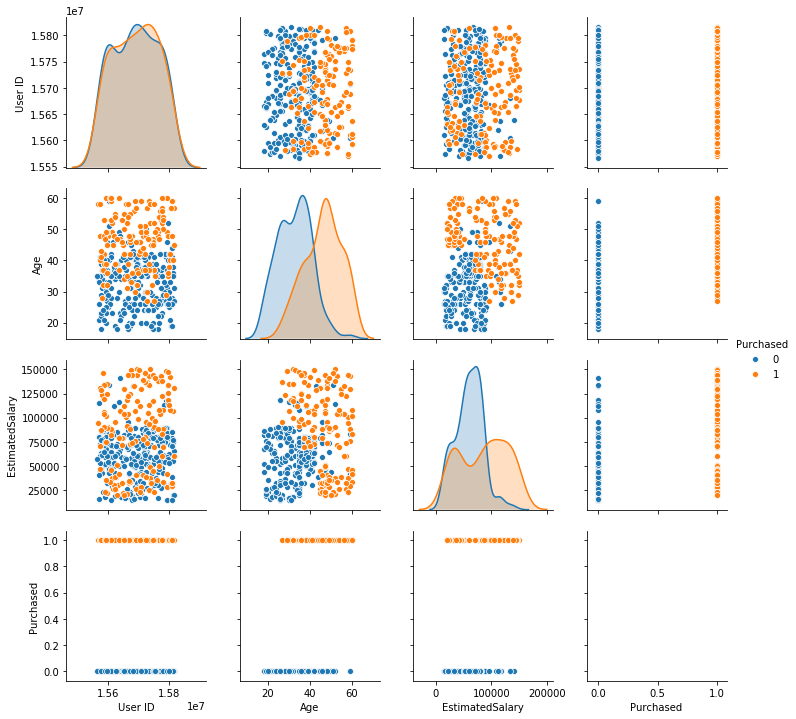

In [12]:
sns.pairplot(sn,hue='Purchased')

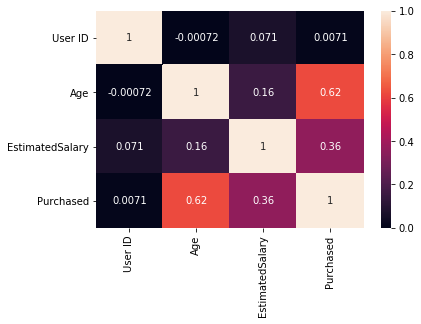

In [18]:
sns.heatmap(sn.corr(),annot=True)

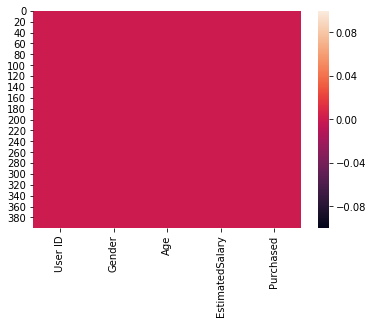

In [19]:
sns.heatmap(sn.isnull())

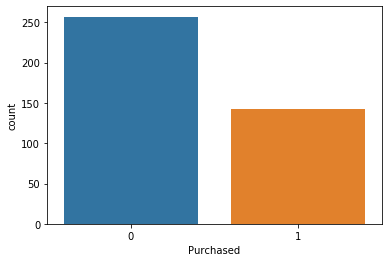

In [20]:
#plotting the count ofthe target data
sns.countplot(x='Purchased',data=sn)

In [21]:
sn.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

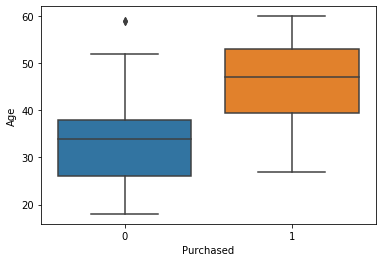

In [22]:
#checking outliers against target variable
sns.boxplot('Purchased', 'Age', data = sn)

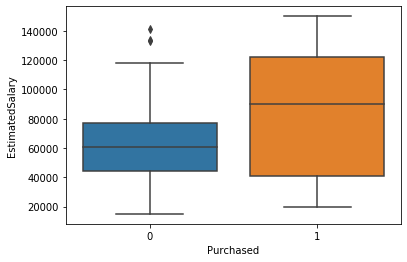

In [23]:
sns.boxplot('Purchased', 'EstimatedSalary', data = sn)

In [6]:
#changing categorical value to numerical value
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [7]:
for col in sn.columns:
    sn[col]=le.fit_transform(sn[col])
sn.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,97,1,1,4,0
1,392,1,17,5,0
2,155,0,8,26,0
3,64,0,9,39,0
4,382,1,1,57,0


In [8]:
#chcking outliers
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(sn))
z

array([[0.88767881, 1.02020406, 1.78179743, 1.55022868, 0.74593581],
       [1.66710411, 1.02020406, 0.25358736, 1.51662303, 0.74593581],
       [0.38538251, 0.98019606, 1.11320552, 0.81090436, 0.74593581],
       ...,
       [0.60188954, 0.98019606, 1.17910958, 1.51662303, 1.34059793],
       [0.91365966, 1.02020406, 0.15807423, 1.11335522, 0.74593581],
       [1.33801343, 0.98019606, 1.08359645, 1.01253827, 1.34059793]])

In [9]:
threshold=3
print(np.where(z>3))
df=sn[(z<3).all(axis=1)]
df

(array([], dtype=int32), array([], dtype=int32))


,User ID,Gender,Age,EstimatedSalary,Purchased
0,97,1,1,4,0
1,392,1,17,5,0
2,155,0,8,26,0
3,64,0,9,39,0
4,382,1,1,57,0
5,263,1,9,40,0
6,55,0,9,65,0
7,202,0,14,116,1
8,61,1,7,17,0
9,260,0,17,47,0


In [10]:
print(sn.shape)
print(df.shape)

(400, 5)
(400, 5)


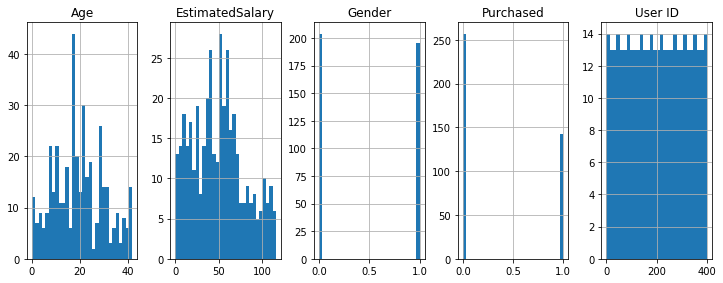

In [11]:
#checking skewness
df.hist(figsize=(20,10),grid=True,layout=(2,8),bins=30)
plt.show()

In [36]:
import scipy.stats as stats
stats.skew(df)

array([0.        , 0.040008  , 0.23046904, 0.3081678 , 0.59466211])

In [12]:
x=df.drop("Purchased",axis=1)

In [13]:
y=df['Purchased']

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [147]:
print(x.shape)
print(y.shape)

(400, 4)
(400,)


In [15]:
#splitting the data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.22, random_state = 42)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(312, 4)
(88, 4)
(312,)
(88,)


In [17]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

87.5
[[53  2]
 [ 9 24]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.91        55
           1       0.92      0.73      0.81        33

    accuracy                           0.88        88
   macro avg       0.89      0.85      0.86        88
weighted avg       0.88      0.88      0.87        88



In [18]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb)*100)
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

90.9090909090909
[[53  2]
 [ 6 27]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        55
           1       0.93      0.82      0.87        33

    accuracy                           0.91        88
   macro avg       0.91      0.89      0.90        88
weighted avg       0.91      0.91      0.91        88



In [19]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc)*100)
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

87.5
[[49  6]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        55
           1       0.82      0.85      0.84        33

    accuracy                           0.88        88
   macro avg       0.87      0.87      0.87        88
weighted avg       0.88      0.88      0.88        88



In [20]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn)*100)
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

90.9090909090909
[[52  3]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        55
           1       0.90      0.85      0.88        33

    accuracy                           0.91        88
   macro avg       0.91      0.90      0.90        88
weighted avg       0.91      0.91      0.91        88



In [21]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[51  4]
 [ 3 30]]
92.04545454545455


In [22]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [23]:
svmkernel('rbf')

0.9318181818181818
[[51  4]
 [ 2 31]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        55
           1       0.89      0.94      0.91        33

    accuracy                           0.93        88
   macro avg       0.92      0.93      0.93        88
weighted avg       0.93      0.93      0.93        88



In [24]:
svmkernel('poly')

0.8181818181818182
[[55  0]
 [16 17]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        55
           1       1.00      0.52      0.68        33

    accuracy                           0.82        88
   macro avg       0.89      0.76      0.78        88
weighted avg       0.86      0.82      0.80        88



In [25]:
svmkernel('linear')

0.8522727272727273
[[53  2]
 [11 22]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        55
           1       0.92      0.67      0.77        33

    accuracy                           0.85        88
   macro avg       0.87      0.82      0.83        88
weighted avg       0.86      0.85      0.85        88



In [31]:
#plotting aucroc curve 
svc=SVC(kernel='rbf',probability=True)
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

93.18181818181817
[[51  4]
 [ 2 31]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        55
           1       0.89      0.94      0.91        33

    accuracy                           0.93        88
   macro avg       0.92      0.93      0.93        88
weighted avg       0.93      0.93      0.93        88



In [32]:
#roc-curve
from sklearn.metrics import roc_curve
y_pred_prob=svc.predict_proba(x_test)[:,1]
y_pred_prob

array([0.88617577, 0.89393444, 0.01015574, 0.78178202, 0.01708502,
       0.0129206 , 0.8107415 , 0.05684946, 0.13610707, 0.15989727,
       0.01599631, 0.88939218, 0.01495601, 0.05210423, 0.0837621 ,
       0.73152019, 0.9456336 , 0.44438771, 0.06432093, 0.93339786,
       0.03882061, 0.02885562, 0.71037292, 0.90019784, 0.06975038,
       0.96867435, 0.32743834, 0.02429603, 0.91689748, 0.04422847,
       0.68269609, 0.01505499, 0.98871169, 0.04092668, 0.78325927,
       0.0447444 , 0.02383599, 0.03458835, 0.01620542, 0.025685  ,
       0.82868161, 0.00733861, 0.01742842, 0.85910776, 0.00895718,
       0.96300491, 0.00824124, 0.01606584, 0.78343916, 0.04110496,
       0.03775526, 0.82376834, 0.03549126, 0.02538608, 0.08122197,
       0.02163452, 0.94820471, 0.63207273, 0.03666647, 0.02092058,
       0.11930239, 0.04251208, 0.82827956, 0.06472508, 0.0092545 ,
       0.91324135, 0.39283549, 0.96343127, 0.0380213 , 0.66051264,
       0.94250779, 0.09714341, 0.00419902, 0.0419535 , 0.76377

In [33]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [34]:
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.         0.01818182 0.01818182 0.03636364
 0.03636364 0.09090909 0.09090909 0.30909091 0.30909091 1.        ]
[0.         0.03030303 0.54545455 0.54545455 0.84848485 0.84848485
 0.93939394 0.93939394 0.96969697 0.96969697 1.         1.        ]
[1.98871169 0.98871169 0.88875015 0.88617577 0.76377473 0.73152019
 0.68269609 0.44438771 0.39283549 0.06432093 0.06198079 0.00419902]


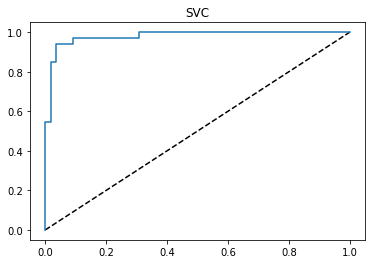

In [35]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="SVC")
plt.title("SVC")
plt.show()

In [36]:
from sklearn.externals import joblib

In [37]:
#saving the model as pickl
joblib.dump(svc,"Project 20_social network.pkl")

['Project 20_social network.pkl']

In [39]:
#loading the model
svc_from_joblib=joblib.load('Project 20_social network.pkl')

In [40]:
#using the model to make prediction
svc_from_joblib.predict(x_test)

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1])